# Data lab 2 - Portfolio Optimization

#### Note 1: Review what you have learned in DataCamp assignments (e.g., Introduction to Portfolio Analysis in Python).
#### Note 2: To deep dive into what each function does, use the help function, e.g., run "help(npf.npv)." 

### 1. Craft an all-weather portfolio. Pick a portfolio of stocks following an investment theme that has stood and will stand the test of time. Extract the data from Yahoo Finance and explore the statistical distribution of each stock's past 5-year returns.

In [7]:
# Import the necessary packages
import yfinance as yf
import datetime as dt 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

symbols_list = ["AAPL", "AMZN", "GOOG", "BP", "KMI", "BABA", "TCEHY", "BYDDY", "PAAS", "CCJ"]

start = dt.datetime(2017,8,31)      ## Specify the starting point of historical price
end = dt.datetime(2022,8,31)      ## Specify the ending point of historical price

df = yf.download(symbols_list, start=start, end=end)      ## Download the price data

print(df.head())      ## Print the head of the dataframe to check the column names

[*********************100%***********************]  10 of 10 completed
            Adj Close                                                         \
                 AAPL       AMZN        BABA         BP      BYDDY       CCJ   
Date                                                                           
2017-08-30  38.757450  48.379501  171.250000  25.691235  11.919320  9.524320   
2017-08-31  38.911678  49.029999  171.740005  25.960327  11.830296  9.668920   
2017-09-01  38.923538  48.912498  171.039993  25.990232  11.850079  9.649640   
2017-09-05  38.456127  48.263500  169.919998  26.124786  11.721490  9.601440   
2017-09-06  38.415791  48.389999  168.139999  26.401354  11.919320  9.707478   

                                                        ...     Volume  \
                 GOOG        KMI       PAAS      TCEHY  ...       AAPL   
Date                                                    ...              
2017-08-30  46.478500  14.443090  17.287399  41.306946  ...  10907

In [8]:
# Keep only the adjusted close in the dataframe
# Note that the date is in the index
price = df["Adj Close"]

# Calculate return using method pct_change
# Find out more about .pct_change with help!
pct_return = price.pct_change()

# deep dive into the first five rows of observations in the dataframe
print(pct_return.head(5))

                AAPL      AMZN      BABA        BP     BYDDY       CCJ  \
Date                                                                     
2017-08-30       NaN       NaN       NaN       NaN       NaN       NaN   
2017-08-31  0.003979  0.013446  0.002861  0.010474 -0.007469  0.015182   
2017-09-01  0.000305 -0.002396 -0.004076  0.001152  0.001672 -0.001994   
2017-09-05 -0.012008 -0.013269 -0.006548  0.005177 -0.010851 -0.004995   
2017-09-06 -0.001049  0.002621 -0.010476  0.010586  0.016878  0.011044   

                GOOG       KMI      PAAS     TCEHY  
Date                                                
2017-08-30       NaN       NaN       NaN       NaN  
2017-08-31  0.010499  0.013634  0.019115  0.009540  
2017-09-01 -0.002119  0.001552  0.001072 -0.007796  
2017-09-05 -0.009484 -0.000517  0.025161 -0.025476  
2017-09-06 -0.000689 -0.001034 -0.019321  0.020278  


In [9]:
des = pd.DataFrame()
# Print the daily return mean of each asset
mean = pct_return.mean(axis=0)
des['mean'] = mean

# Print the daily return standard deviation of each asset
std = pct_return.std(axis=0)
des['standard dev.'] = std

# Print the skewness of each asset 

skew = pct_return.skew(axis=0)
des['skewness'] = skew

# Print the kurtosis of each asset
kurt = pct_return.kurtosis(axis=0)
des['kurtosis'] = kurt

print(des.transpose())

                   AAPL      AMZN       BABA         BP     BYDDY       CCJ  \
mean           0.001328  0.001013  -0.000077   0.000424  0.001928  0.001354   
standard dev.  0.020289  0.021663   0.028686   0.022957  0.034618  0.030143   
skewness      -0.098677  0.106445   1.776765   0.026474  0.785120  0.478180   
kurtosis       5.098176  5.197694  23.419272  15.559981  3.769775  4.724911   

                   GOOG        KMI      PAAS      TCEHY  
mean           0.000861   0.000405  0.000398   0.000321  
standard dev.  0.018808   0.020267  0.031659   0.026622  
skewness      -0.001428  -1.039886  0.044615   1.474107  
kurtosis       4.186795  20.822194  6.825358  20.045538  


### 2. Build an equally-weighted all-weather portfolio of your stock picks. Then, deep dive into the return characteristics of the portfolio (i.e., annualized portfolio return and volatility, portfolio's Sharpe ratio, portfolio's daily return profile - mean, volatility, skewness, kurtosis). Finally, draw the cumulative return of your all-weather portfolio for the past five years.

############## Overview ##############
The first few rows of the portfolio's daily return is:
Date
2017-08-30         NaN
2017-08-31    0.009126
2017-09-01   -0.001263
2017-09-05   -0.005281
2017-09-06    0.002884
Name: Portfolio, dtype: float64


############## RETURN PROFILE ##############
Mean                     0.000800
Volatility               0.015900
Skewness                -0.314600
Kurtosis                 6.795000
Annualized Return        0.183300
Annualized Volatility    0.251213
Sharpe Ratio             0.602300
dtype: float64


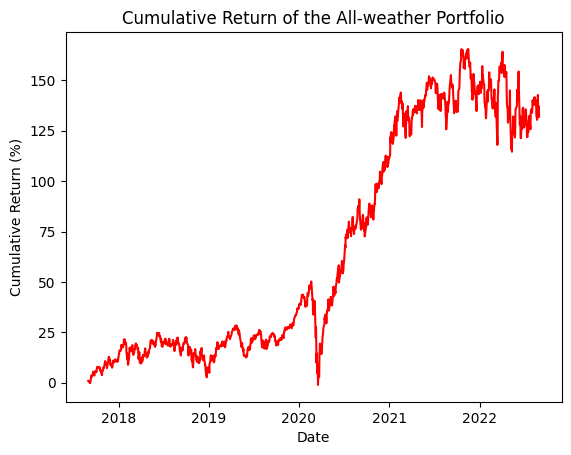

In [10]:
## Equal weights for the portfolio
weight = np.array([0.1])
for i in np.arange(0, 9):
    weight = np.append(weight, 0.1)

## Calculate annual expected portfolio performance
pct_return['Portfolio'] = pct_return.dot(weight)

class Performance_Summary:

    def __init__(self, return_series, num_yrs, num_digi=4, risk_free=0.032):
        self.return_series = return_series
        self.num_yrs = num_yrs
        self.num_digi = num_digi
        self.risk_free = risk_free

    def mean(self):
        return round(self.return_series.mean(), self.num_digi)

    def std(self):
        return round(self.return_series.std(), self.num_digi)

    def skew(self):
        return round(self.return_series.skew(), self.num_digi)

    def kurt(self):
        return round(self.return_series.kurtosis(), self.num_digi)

    def annualized_return(self):
        total = (1 +self.return_series).cumprod()[-1] - 1
        annual = (1 + total)**(1/self.num_yrs) - 1
        return round(annual, self.num_digi)

    def annualized_std(self):
        return self.return_series.std() * np.sqrt(250)

    def Sharpe(self, sharpe):
        if sharpe:
            return round((self.annualized_return() - self.risk_free)/self.annualized_std(), self.num_digi)
        else:
            return None

    def plot(self, title):
        cum_return = (1+self.return_series).cumprod()-1
        plt.plot(cum_return.index, cum_return * 100, color='red')

        plt.xlabel('Date')
        plt.ylabel('Cumulative Return (%)')
        plt.title(title)

        plt.show()

    def summary(self, sharpe):
        array = pd.Series([self.mean(), self.std(), self.skew(), self.kurt(),
                          self.annualized_return(), self.annualized_std(), self.Sharpe(sharpe)],
                          index=['Mean', 'Volatility', 'Skewness', 'Kurtosis', 'Annualized Return', 'Annualized Volatility', 'Sharpe Ratio']).dropna()
        print('\n')
        print('############## RETURN PROFILE ##############')
        print(array)

        return array


## Output an overview of the two sets of returns
print('############## Overview ##############')
print("\033[4m" + 'The first few rows of the portfolio\'s daily return is:' + "\033[0m")
print(pct_return['Portfolio'].head())

############ Daily Return Features ############
all_weather_profile = Performance_Summary(pct_return['Portfolio'], 5)

all_weather_profile.summary(True)

all_weather_profile.plot('Cumulative Return of the All-weather Portfolio')

### 3. Repeat (2) but with the maximum Sharpe portfolio and minimum volatility portfolio.

############## Overview ##############
The first few rows of the portfolio's daily return is:
Date
2017-08-30         NaN
2017-08-31    0.002773
2017-09-01    0.000347
2017-09-05   -0.011023
2017-09-06    0.003982
Name: Sharpe Optimal, dtype: float64


############## RETURN PROFILE ##############
Mean                     0.001500
Volatility               0.019000
Skewness                -0.183500
Kurtosis                 3.918100
Annualized Return        0.378500
Annualized Volatility    0.299665
Sharpe Ratio             1.156300
dtype: float64


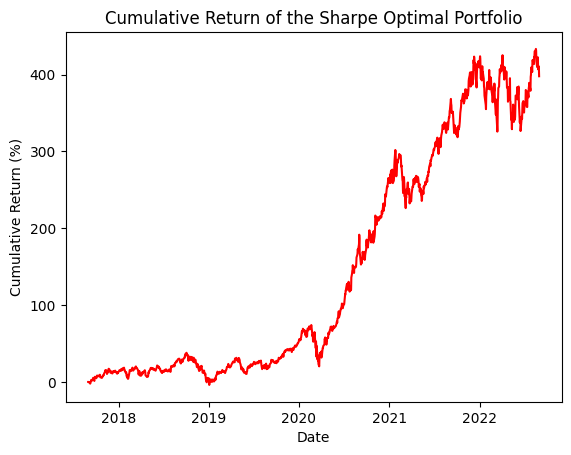

In [11]:
# Import the packages
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

# Calculate expected returns mu
mu = expected_returns.mean_historical_return(price)

# Calculate the covariance matrix sigma
sigma = risk_models.sample_cov(price)

# Obtain the efficient frontier
ef = EfficientFrontier(mu, sigma)

############## Maximum Sharpe Ratio Portfolio ##############
raw_weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()

pct_return['Sharpe Optimal'] = 0

for columns in pct_return:
    if columns != 'Portfolio' and columns != 'Sharpe Optimal' and columns != 'Volatility Optimal':
        pct_return['Sharpe Optimal'] = pct_return['Sharpe Optimal'] + pct_return[columns] * cleaned_weights[columns]

#####################
## Redo Everything ##
#####################

## Output an overview of the two sets of returns
print('############## Overview ##############')
print("\033[4m" + 'The first few rows of the portfolio\'s daily return is:' + "\033[0m")
print(pct_return['Sharpe Optimal'].head())

############ Daily Return Features ############
sharpe_profile = Performance_Summary(pct_return['Sharpe Optimal'], 5)

sharpe_profile.summary(True)

sharpe_profile.plot('Cumulative Return of the Sharpe Optimal Portfolio')


Expected annual return: 12.1%
Annual volatility: 23.6%
Sharpe Ratio: 0.38
(0.12082638905787679, 0.23570283205646017, 0.37685753829465807)
############## Overview ##############
The first few rows of the portfolio's daily return is:
Date
2017-08-30         NaN
2017-08-31    0.011836
2017-09-01   -0.000825
2017-09-05   -0.004376
2017-09-06    0.000493
Name: Volatility Optimal, dtype: float64


############## RETURN PROFILE ##############
Mean                     0.000700
Volatility               0.014800
Skewness                -0.697100
Kurtosis                 9.894900
Annualized Return        0.158000
Annualized Volatility    0.234766
Sharpe Ratio             0.536700
dtype: float64


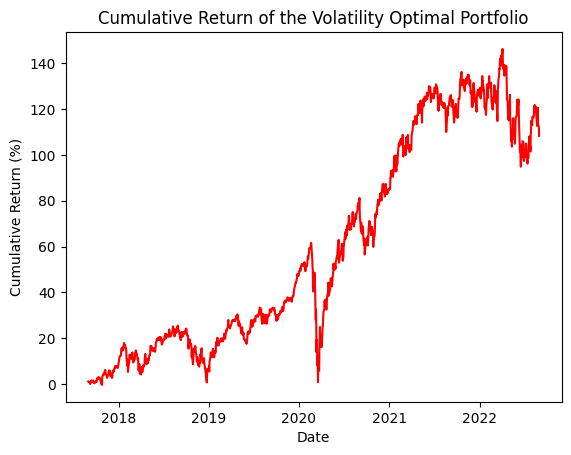

In [12]:
# Obtain the efficient frontier
ef = EfficientFrontier(mu, sigma)

############## Minimum Volatility Portfolio ##############
raw_weights = ef.min_volatility()

cleaned_weights = ef.clean_weights()

print(ef.portfolio_performance(verbose=True, risk_free_rate=0.032))

pct_return['Volatility Optimal'] = 0

for columns in pct_return:
    if columns != 'Portfolio' and columns != 'Volatility Optimal' and columns != 'Sharpe Optimal':
        pct_return['Volatility Optimal'] = pct_return['Volatility Optimal'] + pct_return[columns] * cleaned_weights[columns]

#####################
## Redo Everything ##
#####################

## Output an overview of the two sets of returns
print('############## Overview ##############')
print("\033[4m" + 'The first few rows of the portfolio\'s daily return is:' + "\033[0m")
print(pct_return['Volatility Optimal'].head())

############ Daily Return Features ############
volatility_profile = Performance_Summary(pct_return['Volatility Optimal'], 5)

volatility_profile.summary(True)

volatility_profile.plot('Cumulative Return of the Volatility Optimal Portfolio')


### 4. [Optional Bonus] With PyPortfolioOpt, how can you further improve your all-weather portfolio construction? Hint: The Black-Litterman model (https://pyportfolioopt.readthedocs.io/en/latest/BlackLitterman.html) to express subjective views and L2 regularisation to alleviate extreme portfolio allocation (i.e., weights).